<a href="https://colab.research.google.com/github/dharunS05/Python/blob/main/iris_gui_app/Iris_flower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as train_test_split
import sklearn.neighbors as KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load Datasets

In [ ]:
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(df['species'].unique())

modified_df = df.replace({'species':{'setosa':0,'versicolor':1,'virginica':2}})
modified_df.head()

['setosa' 'versicolor' 'virginica']


/tmp/ipython-input-4-1561407490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modified_df = df.replace({'species':{'setosa':0,'versicolor':1,'virginica':2}})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


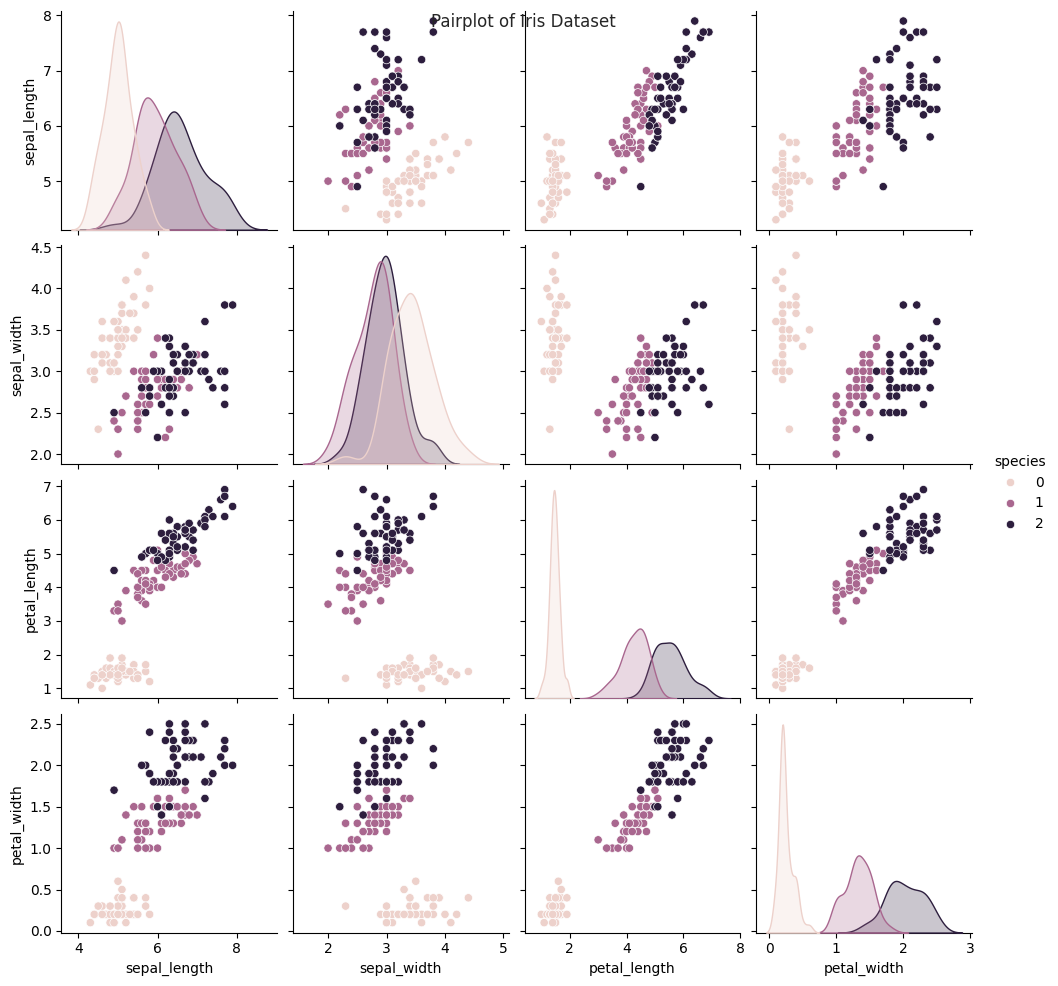

In [ ]:
sns.pairplot(modified_df,hue='species')
sns.set_style('whitegrid')
plt.suptitle('Pairplot of Iris Dataset')
plt.show()

In [ ]:
X = modified_df.drop('species',axis=1)
y = modified_df['species']

In [ ]:
model = KNeighborsClassifier.KNeighborsClassifier(n_neighbors=5)
x_train,x_test,y_train,y_test = train_test_split.train_test_split(X,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score:
1.0


In [ ]:
import pickle

with open("iris_model.pkl","wb") as f:
  pickle.dump(model,f)



In [ ]:
from google.colab import files
files.download('iris_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>